In [6]:
import pandas as pd
import numpy as np
import os

icpath = '/scratch/dtamayo/selectic/data/'

df = pd.read_csv('../datatmax.csv', index_col=0)
df = df.sort_index()
df.head(25)

,K,mag,filename,tmax,tinstability
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,50000000.0
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,50000000.0
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,50000000.0
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,50000000.0
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,50000000.0
8,558.290,0.804678,IC8K5.5829e+02mag8.0468e-01.bin,50000000.0,50000000.0
10,348.850,0.001154,IC10K3.4885e+02mag1.1541e-03.bin,50000000.0,50000000.0
13,359.260,0.005160,IC13K3.5926e+02mag5.1597e-03.bin,50000000.0,50000000.0
15,498.470,0.003441,IC15K4.9847e+02mag3.4410e-03.bin,50000000.0,50000000.0
16,27.963,0.037110,IC16K2.7963e+01mag3.7110e-02.bin,50000000.0,50000000.0


In [5]:
import rebound
def Eerr1(row):
    sa = rebound.SimulationArchive(icpath+row['filename'])
    E0 = sa[0].calculate_energy()
    E1 = sa[1].calculate_energy()
    return abs((E1-E0)/E0)
    
df['Eerr1'] = df.apply(Eerr1, axis=1)
df.tail()

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


,K,mag,filename,tmax,tinstability,Eerr1
984,28.237,0.076254,IC984K2.8237e+01mag7.6254e-02.bin,5000000.0,5000000.0,1.594734e-08
986,201.970,0.052832,IC986K2.0197e+02mag5.2832e-02.bin,5000000.0,5000000.0,6.400428e-08
990,914.570,0.006452,IC990K9.1457e+02mag6.4517e-03.bin,5000000.0,5000000.0,2.984324e-08
995,53.041,0.903496,IC995K5.3041e+01mag9.0350e-01.bin,5000000.0,5000000.0,1.902751e-07
997,77.841,0.530969,IC997K7.7841e+01mag5.3097e-01.bin,5000000.0,5000000.0,3.344768e-08


In [3]:
import rebound
def Eerrf(row):
    sa = rebound.SimulationArchive(icpath+row['filename'])
    E0 = sa[0].calculate_energy()
    E1 = sa[-1].calculate_energy()
    return abs((E1-E0)/E0)
    
icpath = '/scratch/dtamayo/selectic/data/'
df['Eerrf'] = df.apply(Eerrf, axis=1)
df.tail()

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


,K,mag,filename,tmax,tinstability,Eerr1,Eerrf
984,28.237,0.076254,IC984K2.8237e+01mag7.6254e-02.bin,5000000.0,5000000.0,1.594734e-08,5.133228e-04
986,201.970,0.052832,IC986K2.0197e+02mag5.2832e-02.bin,5000000.0,5000000.0,6.400428e-08,1.527312e-07
990,914.570,0.006452,IC990K9.1457e+02mag6.4517e-03.bin,5000000.0,5000000.0,2.984324e-08,1.153799e-07
995,53.041,0.903496,IC995K5.3041e+01mag9.0350e-01.bin,5000000.0,5000000.0,1.902751e-07,7.656570e-05
997,77.841,0.530969,IC997K7.7841e+01mag5.3097e-01.bin,5000000.0,5000000.0,3.344768e-08,6.600447e-04


(array([   5.,   32.,  147.,  127.,   37.,   19.,    1.,    0.,    0.,    1.]),
 array([-9.15462284, -8.42576835, -7.69691386, -6.96805937, -6.23920489,
        -5.5103504 , -4.78149591, -4.05264142, -3.32378693, -2.59493245,
        -1.86607796]),
 <a list of 10 Patch objects>)

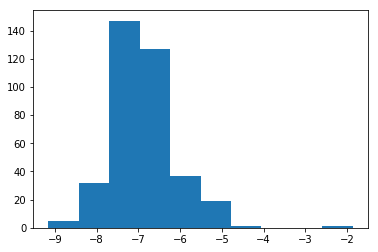

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(np.log10(df['Eerr1']))

(array([  16.,  102.,   81.,   19.,   41.,   94.,    0.,    0.,   13.,    3.]),
 array([-8.9399378 , -7.90930677, -6.87867575, -5.84804472, -4.81741369,
        -3.78678266, -2.75615164, -1.72552061, -0.69488958,  0.33574145,
         1.36637247]),
 <a list of 10 Patch objects>)

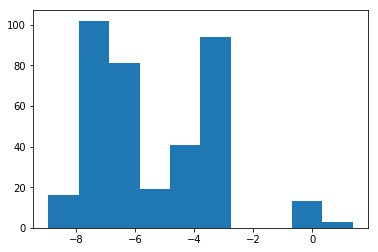

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(np.log10(df['Eerrf']))

In [37]:
import rebound
def instabilitytime(row):
    print(row.name)
    maxdistance=1. # stop if any planet gets beyond this many AU
    sa = rebound.SimulationArchive(icpath+row['filename'])
    if row['Eerrf'] < 1.e-2:
        row['tinstability_index'] = np.nan
        row['tinstability'] = sa[-1].t
        return row
    E0 = sa[0].calculate_energy()
    Eerr = np.zeros(len(sa))
    times = np.zeros(len(sa))
    for i, sim in enumerate(sa):
        times[i] = sim.t
        Ef = sim.calculate_energy()
        Eerr[i] = abs((Ef-E0)/E0)
        unstable=False
        if Eerr[i] > 1.e-2:
            unstable=True
        for p in sim.particles[1:]:
            if p.d > maxdistance:
                unstable=True
        if unstable is True:
            row['tinstability_index'] = i-1
            break
            
    tnext = sim.t
    sim = sa[i-1]
    ps = sim.particles
    Hillradius = (ps[1].m/(3.*ps[0].m))**(1./3.)*ps[1].a
    for p in sim.particles[1:]:
        p.r = Hillradius

    def collision(reb_sim, col):
        reb_sim.contents._status = 5
        p1 = sim.particles[col.p1]
        p2 = sim.particles[col.p2]
        d = np.sqrt((p1.x-p2.x)**2 + (p1.y-p2.y)**2 +(p1.z-p2.z)**2)
        print(col.p1, col.p2, d)
        return 0
    sim.collision = "direct"
    sim.collision_resolve = collision
    sim.exit_max_distance=maxdistance
    
    try:
        sim.integrate(tnext, exact_finish_time=0)
    except rebound.Escape as error:
        sim._status = 5
        
    if sim._status == 5:
        row['tinstability'] = sim.t
    else:
        row['tinstability'] = sa[-1].t
    return row

In [1]:
sa = rebound.SimulationArchive(icpath+row['filename'])
sim = sa[443]
rebound.OrbitPlot(sim);

NameError: name 'rebound' is not defined

In [36]:
icpath = '/scratch/dtamayo/selectic/data/'
df = df.apply(instabilitytime, axis=1)
df.tail()

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


4 3 0.000467696446373
3 4 0.000467696446373
6 5 0.000640919096838
5 6 0.000640919096838
4 3 0.000273500036128
3 4 0.000273500036128
4 5 0.00024812626141
5 4 0.00024812626141
5 4 0.000330118645351
4 5 0.000330118645351
3 4 0.000539940305459
4 3 0.000539940305459
1 3 0.000607299073796
3 1 0.000607299073796
6 3 0.000640265355185
3 6 0.000640265355185
4 3 0.000589434762497
3 4 0.000589434762497
2 3 0.000562893647855
3 2 0.000562893647855
4 3 0.000399888928728
3 4 0.000399888928728
3 4 0.000476026905942
4 3 0.000476026905942
5 4 0.000214272021282
4 5 0.000214272021282


,K,mag,filename,tmax,tinstability,Eerr1,Eerrf,tinstability_index
984,28.237,0.076254,IC984K2.8237e+01mag7.6254e-02.bin,5000000.0,5000000.0,1.594734e-08,5.133228e-04,NaN
986,201.970,0.052832,IC986K2.0197e+02mag5.2832e-02.bin,5000000.0,5000000.0,6.400428e-08,1.527312e-07,NaN
990,914.570,0.006452,IC990K9.1457e+02mag6.4517e-03.bin,5000000.0,5000000.0,2.984324e-08,1.153799e-07,NaN
995,53.041,0.903496,IC995K5.3041e+01mag9.0350e-01.bin,5000000.0,5000000.0,1.902751e-07,7.656570e-05,NaN
997,77.841,0.530969,IC997K7.7841e+01mag5.3097e-01.bin,5000000.0,5000000.0,3.344768e-08,6.600447e-04,NaN


In [42]:
df.head()

,K,mag,filename,tmax,tinstability,Eerr1,Eerrf,tinstability_index
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,5.000000e+07,5.822356e-08,4.967208e-07,NaN
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,5.000000e+07,3.297564e-07,2.164101e-07,NaN
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,5.000000e+07,3.569262e-08,5.113791e-04,NaN
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,2.869029e+06,2.234090e-06,8.162635e-01,2869.0
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,5.000000e+07,3.204928e-08,1.226401e-03,NaN


In [43]:
df.loc[453]

K                                                630.99
mag                                           0.0373272
filename              IC453K6.3099e+02mag3.7327e-02.bin
tmax                                              5e+06
tinstability                                     443001
Eerr1                                       7.93621e-08
Eerrf                                           1.56388
tinstability_index                                  443
Name: 453, dtype: object

In [48]:
df = df[(df['Eerr1'] < 1.e-2)] # remove immediately unstable systems
df.shape

(368, 8)

In [49]:
df.to_csv('../dataEerr.csv', encoding='ascii')

In [8]:
df[(df['Eerrf'] > 5.e-4) & (df['Eerrf'] < 1.e-2)]

,K,mag,filename,tmax,tinstability_notides,tinstability,Eerr1,Eerrf
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,50000000.0,50000000.0,3.569262e-08,0.000511
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,50000000.0,50000000.0,3.204928e-08,0.001226
17,38.845,0.039063,IC17K3.8845e+01mag3.9063e-02.bin,50000000.0,50000000.0,50000000.0,1.088861e-06,0.000810
46,369.540,0.080260,IC46K3.6954e+02mag8.0260e-02.bin,50000000.0,50000000.0,50000000.0,5.719907e-08,0.000539
51,224.630,0.001362,IC51K2.2463e+02mag1.3619e-03.bin,50000000.0,50000000.0,50000000.0,7.805844e-08,0.000524
149,578.920,0.869182,IC149K5.7892e+02mag8.6918e-01.bin,5000000.0,5000000.0,5000000.0,3.643176e-06,0.000537
174,83.191,0.488592,IC174K8.3191e+01mag4.8859e-01.bin,5000000.0,5000000.0,5000000.0,1.183999e-07,0.000537
198,165.810,0.752887,IC198K1.6581e+02mag7.5289e-01.bin,5000000.0,5000000.0,5000000.0,7.026433e-07,0.000736
240,38.638,0.019549,IC240K3.8638e+01mag1.9549e-02.bin,5000000.0,5000000.0,5000000.0,9.670715e-08,0.000609
301,47.267,0.060358,IC301K4.7267e+01mag6.0358e-02.bin,5000000.0,5000000.0,5000000.0,3.372098e-07,0.000630


In [51]:
df[(df['Eerrf'] > 1.e-2)].shape

(15, 8)

In [7]:
import rebound
simID = 62
sim = rebound.Simulation.from_archive(icpath+df.loc[simID,'filename'])
ps = sim.particles
for i in range(6):
    print(ps[i+2].P/ps[i+1].P)
rebound.OrbitPlot(sim);

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: Unknown field found in binary file.
  warnings.warn(message, RuntimeWarning)


-187.21560044376508
2.181171626391276
1.1763852497397136
0.013862288505197105
0.049473052873661966
55.16681171947673


In [8]:
sim.G

39.47841760435743

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


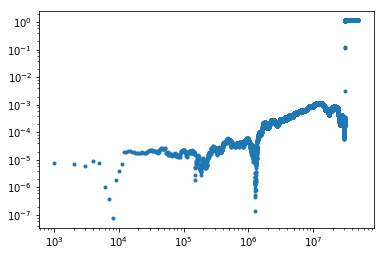

In [17]:
sa = rebound.SimulationArchive(icpath+df.loc[simID,'filename'])
E0 = sa[0].calculate_energy()
Eerr = np.zeros(len(sa))
times = np.zeros(len(sa))
for i, sim in enumerate(sa):
    times[i] = sim.t
    Ef = sim.calculate_energy()
    Eerr[i] = abs((Ef-E0)/E0)
    
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')

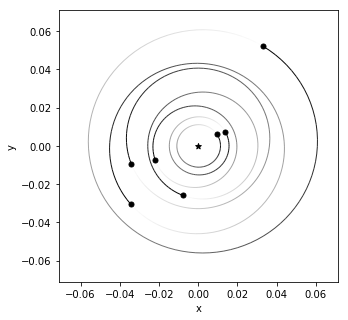

In [18]:
rebound.OrbitPlot(sa[0]);

In [24]:
df = pd.read_csv('../dataEerr.csv', index_col=0)
df.head()

,K,mag,filename,tmax_notides,tinstability_notides,Eerr1,Eerrf
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,5.000000e+07,5.822356e-08,4.967208e-07
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,5.000000e+07,3.297564e-07,2.164101e-07
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,5.000000e+07,3.569262e-08,5.113791e-04
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,2.869165e+06,2.234090e-06,8.162635e-01
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,5.000000e+07,3.204928e-08,1.226401e-03


In [27]:
row = df.loc[100]
sa = rebound.SimulationArchive(icpath+row['filename'])
sa.Nblob

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


5000

In [ ]:
import rebound
def e_rms1(row):
    sa = rebound.SimulationArchive(icpath+row['filename'])
    eccs = np.zeros((7,500))
    for i in range(500):
        
    return abs((E1-E0)/E0)
    
icpath = '/scratch/dtamayo/selectic/data/'
df['Eerr1'] = df.apply(Eerr1, axis=1)
df.tail()

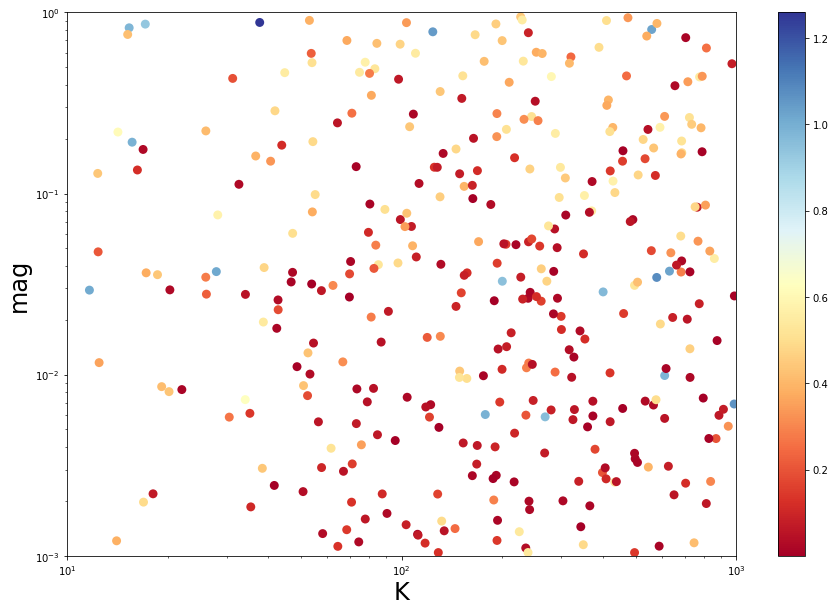

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['K'], df['mag'], c=abs((np.log10(df['Eerrf'])-np.log10(df['Eerr1']))/np.log10(df['Eerr1'])), edgecolor='', s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)

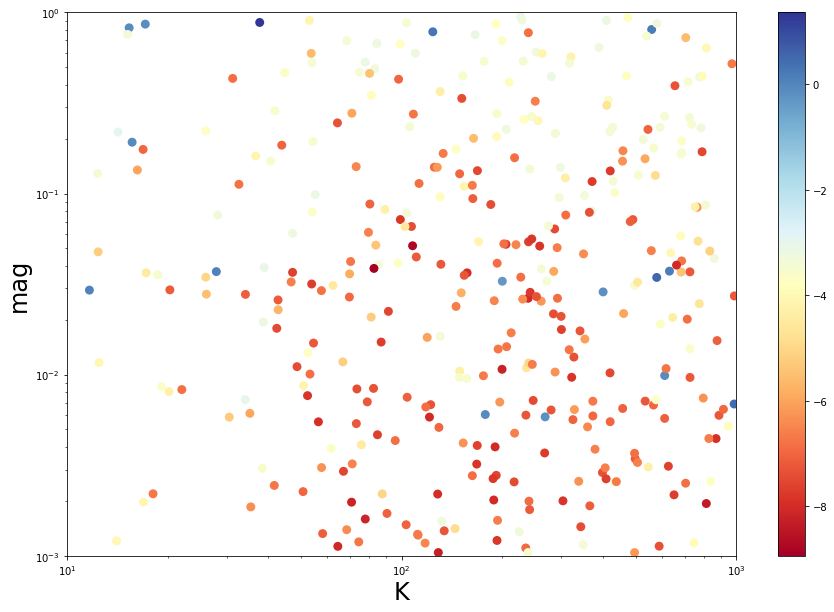

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['K'], df['mag'], c=np.log10(df['Eerrf']), edgecolor='', s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)

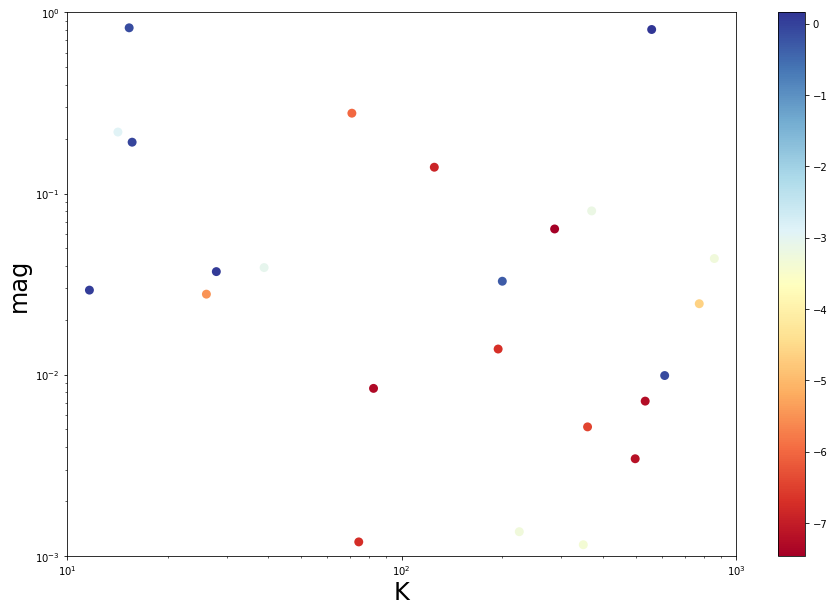

In [80]:
lastsimid = 65
df5e7 = df.loc[0:lastsimid]
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df5e7['K'], df5e7['mag'], c=np.log10(df5e7['Eerrf']), edgecolor='', s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


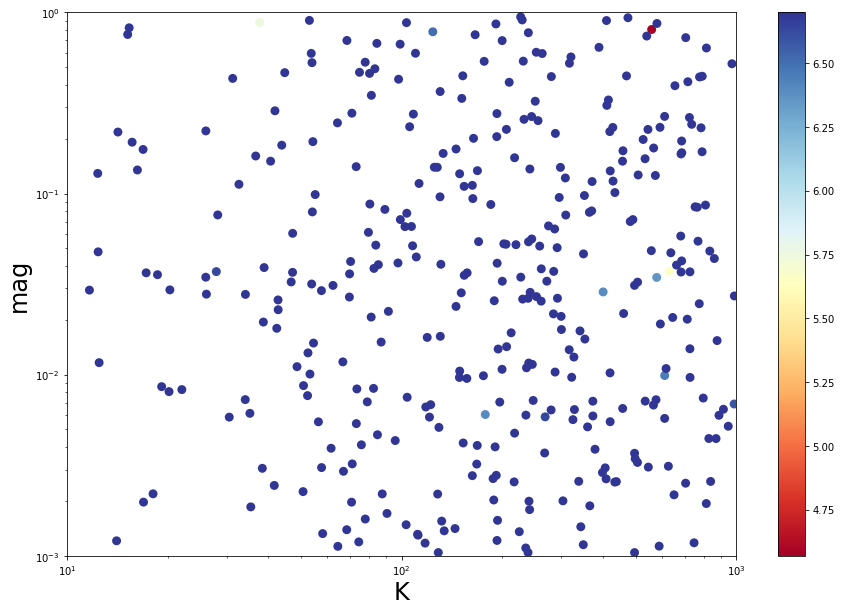

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df['K'], df['mag'], c=np.log10(df['tinstability_notides']), edgecolor='', vmax=np.log10(5e6), s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)

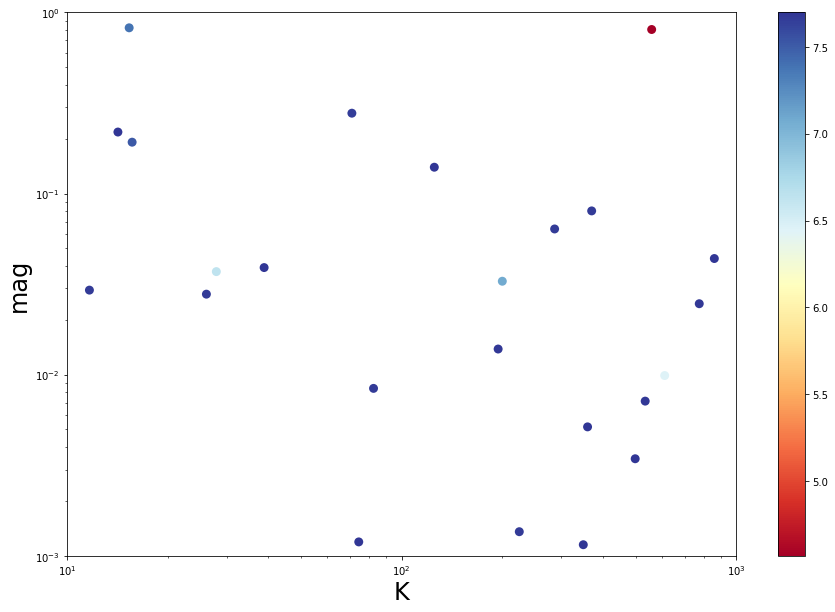

In [24]:
lastsimid = 65
df5e7 = df.loc[0:lastsimid]
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(df5e7['K'], df5e7['mag'], c=np.log10(df5e7['tinstability_notides']), edgecolor='', s=80,cmap=cm)        
ax.set_xlabel('K', fontsize=24)
ax.set_ylabel('mag', fontsize=24)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1000])
ax.set_ylim([1.e-3, 1])
plt.colorbar(sc)